<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Денис, привет!👋</b> 

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/> 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div> 
  

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
 
   
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>  

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.



In [1]:
!pip install shap==0.42.1 -q

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import roc_auc_score, f1_score, make_scorer, accuracy_score, precision_score, recall_score

import shap

from warnings import simplefilter

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Рекомендую начать проект с описания. Представь себя на месте потенциального читателя проекта - сначала нужно обозначить название, контекст, цели, а уже затем переходить к коду.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Важно сначала инсталлировать shap. Перед отправкой работы необходимо перепроверить, что код проекта отрабатывает без падений в среде Практикума.
    
`pip install shap -q`

<div class="alert alert-info">
Да, сделал. Из-за того что локально работал над проектом - не заметил этого
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Cнова привет. Спасибо за заметное оформление твоих комментариев. По исправлениям отлично. Верно, что указываешь конкретную версию phik - это самый правильный подход.
</div> 


# Проект: Обучение с учителем: качество модели

## Описание

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Задача - разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Загрузка данных

Загрузим данные и проведём беглый анализ таблиц

In [3]:
try:
    df_market_file = pd.read_csv('./datasets/market_file.csv')
    df_market_money = pd.read_csv('./datasets/market_money.csv')
    df_market_time = pd.read_csv('./datasets/market_time.csv')
    df_money = pd.read_csv('./datasets/money.csv', sep=';')
except:
    df_market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    df_market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
    df_market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    df_money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', delimiter=';', decimal=',')

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

 Чтобы считывать запятую в разделителе цифр можно уже на этапе загрузки определить разделитель:
    
`df_money = pd.read_csv(file_paths["money"], delimiter = ';', decimal = ',')`
</div>  
 


<div class="alert alert-info">
Круто, не знал об этом. Добавил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Это действие экономит силы.
</div> 


In [4]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [5]:
df_market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [6]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [7]:
df_market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [8]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [9]:
df_market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [10]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [11]:
df_money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Вывод**    
В результате выполнения этапа были загружены и осмотрены все таблицы с данными. У данных обнаружена следующая проблема:
- У столбца "Прибыль" в таблице с выручкой тип object, хотя должен быть float. Проблема будет устранена на этапе предобработки

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Этот момент лучше поправить на этапе загрузки датасета.

<div class="alert alert-info">
Сделал на этапе загрузки
</div>

## Предобработка данных

Проверим все таблицы на пропуски, явные/неявные дупликаты, исправим типы данных

In [12]:
df_market_file.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [13]:
df_market_file.duplicated().sum()

0

In [14]:
df_market_file['Покупательская активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [15]:
df_market_file['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [16]:
df_market_file.loc[df_market_file['Тип сервиса'] == 'стандартт', 'Тип сервиса'] = 'стандарт'
df_market_file['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [17]:
df_market_file['Разрешить сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [18]:
df_market_money.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [19]:
df_market_money.duplicated().sum()

0

In [20]:
df_market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [21]:
df_market_time.isna().sum()

id        0
Период    0
минут     0
dtype: int64

In [22]:
df_market_time.duplicated().sum()

0

In [23]:
df_market_time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [24]:
df_market_time.loc[df_market_time['Период'] == 'предыдцщий_месяц', 'Период'] = 'предыдущий_месяц'
df_market_time['Период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [25]:
df_money.isna().sum()

id         0
Прибыль    0
dtype: int64

In [26]:
df_money.duplicated().sum()

0

In [27]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [28]:
df_money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Отлично по неявным дублям и опечаткам.

</div>  

**Вывод**
В результате предобработки данных:
- Пропуски не обнаружены
- Удалены неявные дупликаты в столбце "Тип сервиса" в таблице с основными данными
- Удалены неявные дупликаты в столбце "Период" в таблице с данными о проведённом пользователями времени
- Исправлен тип данных у столбца "Прибыль" в таблице с данными о выручке

Данные готовы к работе


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 У нас данные внутренней аналитики, они действительно чаще бывают относительно чистыми. Дадасет качественный</div> 
 

## Исследовательский анализ данных

Проведём исследовательский анализ данных во всех таблицах, перед этим отобрав только активных пользователей. Целью анализа является получение портрета пользователя, у которого падает активность. Для этого рассмотрим все признаки пользователей под контрастом их покупательской активности

In [29]:
df_filtered = df_market_money[df_market_money['Период'].isin(['предыдущий_месяц', 'препредыдущий_месяц'])]
user_revenue = df_filtered.groupby('id')['Выручка'].sum().reset_index()
active_users = user_revenue[user_revenue['Выручка'] > 0]['id'].tolist()

df_market_file = df_market_file[df_market_file['id'].isin(active_users)]
df_market_time = df_market_time[df_market_time['id'].isin(active_users)]
df_market_money = df_market_money[df_market_money['id'].isin(active_users)]
df_money = df_money[df_money['id'].isin(active_users)]

print(df_market_file.shape, df_market_time.shape, df_market_money.shape, df_money.shape)

(1297, 13) (2594, 3) (3891, 3) (1297, 2)



<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Верно по неактивным</div> 
 

Посмотрим на распределение таргета

<AxesSubplot:title={'center':'Распределение покупательской активности'}, xlabel='Покупательская активность', ylabel='Density'>

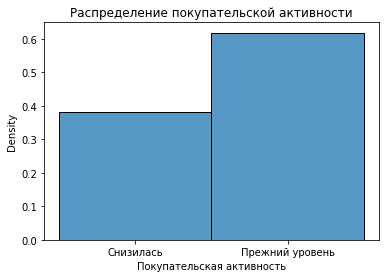

In [30]:
target = 'Покупательская активность'
plt.title('Распределение покупательской активности')
sns.histplot(data=df_market_file, x=target, stat='density')

Дисбаланс у таргета присутствует. Рассмотрим остальные признаки

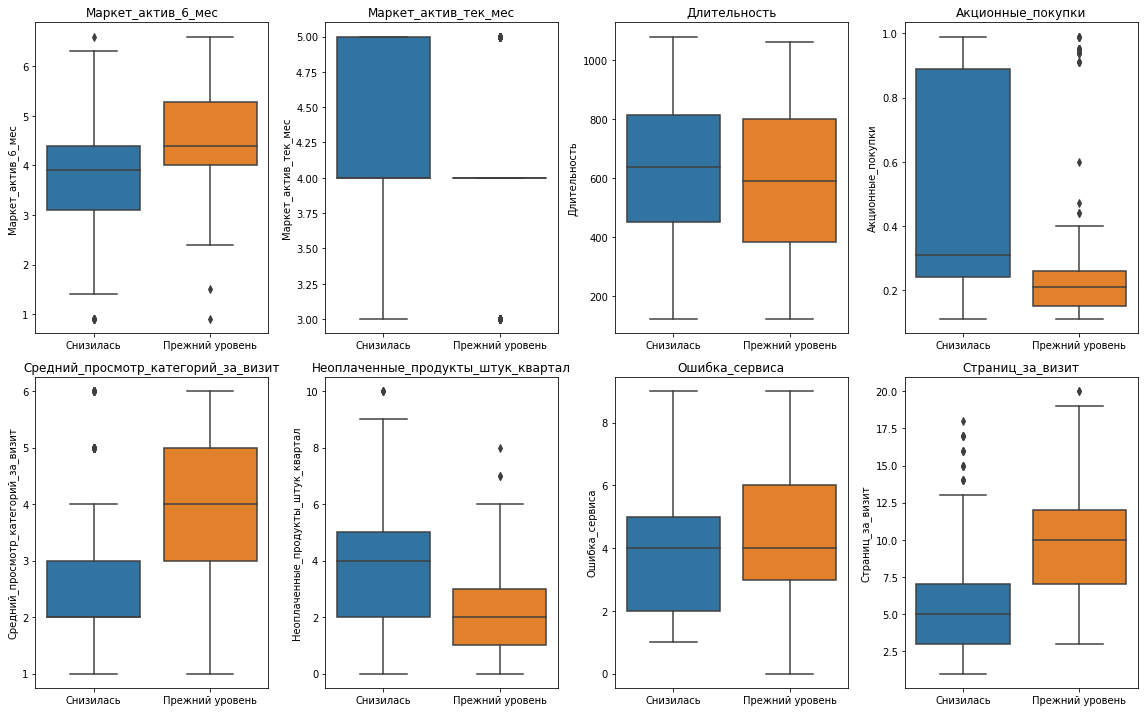

In [31]:
numeric_cols = df_market_file.drop('id', axis=1).select_dtypes(include=['number']).columns

n_cols_per_row = (len(numeric_cols) + 1) // 2

fig, axes = plt.subplots(2, n_cols_per_row, figsize=(4*n_cols_per_row, 10))

axes_flat = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes_flat[i]
    sns.boxplot(data=df_market_file, x=target, y=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')


plt.tight_layout()
plt.show()

Покупатели со сниженной активностью получали меньше рекламы за 6 месяцев, однако в этом месяце - гораздо больше чем пользователи которые не снизили свою активность. Помимо этого, пользователи со сниженной активностью в основном делают акционные покупки. Различие групп также сильно наблюдается и во времени, которые пользователи проводят в сервисе - пользователи со сниженной активностью смотрят меньше категорий и страниц за один визит. У пользователей со сниженной активностью также больше неоплаченных товаров за квартал. 

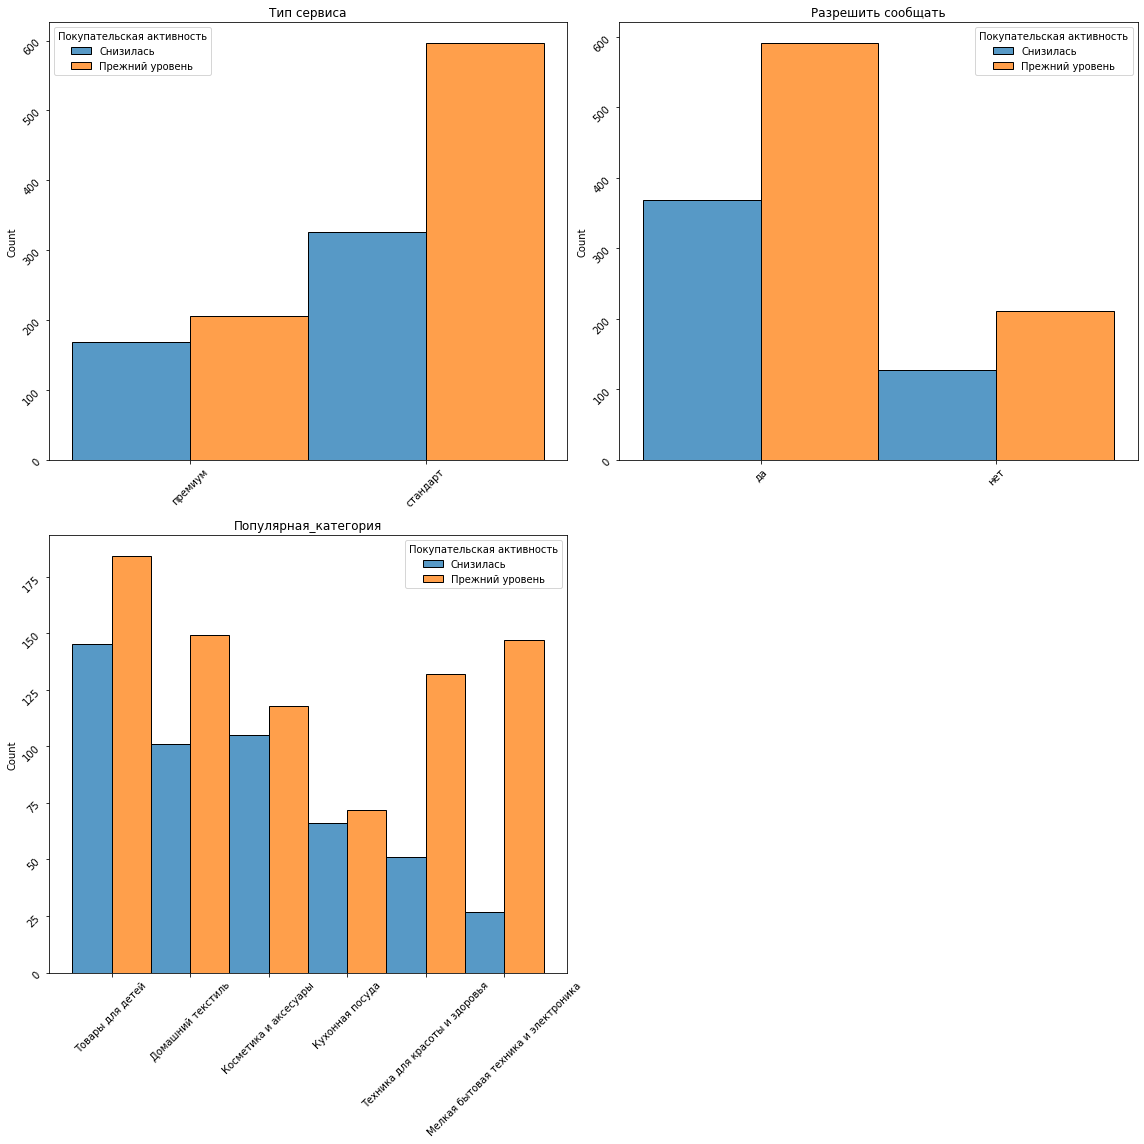

In [32]:
cat_cols = df_market_file.drop(['id', 'Покупательская активность'], axis=1).select_dtypes(exclude=['number']).columns

n_cols_per_row = (len(cat_cols) + 1) // 2

fig, axes = plt.subplots(2, n_cols_per_row, figsize=(8*n_cols_per_row, 16))

axes_flat = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes_flat[i]
    ax.tick_params(labelrotation=45)
    sns.histplot(data=df_market_file, x=col, hue=target, multiple="dodge", ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')

for i in range(len(cat_cols), len(axes_flat)):
    axes_flat[i].set_visible(False)

plt.tight_layout()
plt.show()

Среди категориальных признаков можно отметить что пользователи со сниженной активностью любят пользоваться премиум подпиской

Пользователи со сниженной активностью обладают следующими чертами:
- Низкая активность за одну сессию, смотрит мало категорий и посещает мало страниц
- Ему приходит повышенное количество рекламы
- Очень часто пользуется акциями и скидками на товары

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Нет ли чего необычного в распределении по акционным покупкам?

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 

Рассмотрим данные о времени, которое проводят на сервисе двух категорий

<AxesSubplot:title={'center':'Уходящие пользователи'}, xlabel='Период', ylabel='минут'>

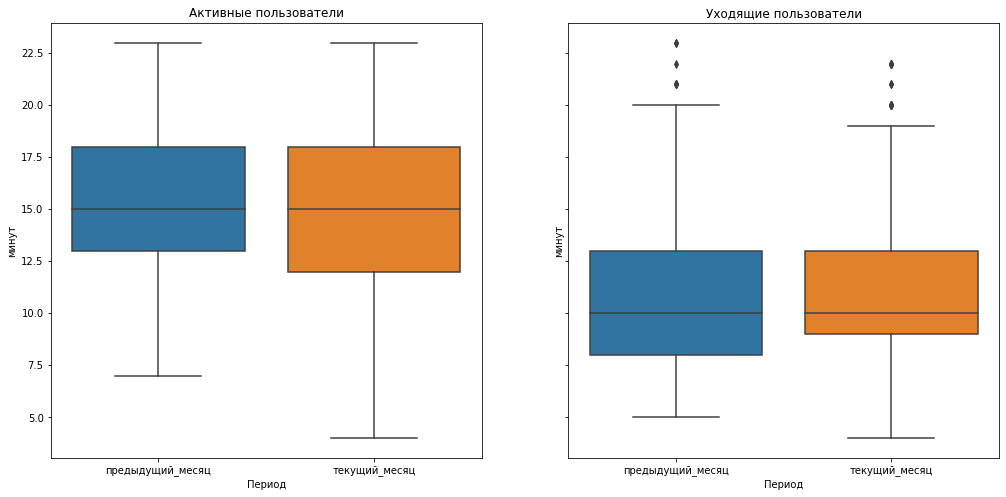

In [33]:
active_ids = df_market_file[df_market_file['Покупательская активность'] != 'Снизилась']['id'].tolist()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8), sharey=True)
ax1.set_title('Активные пользователи')
sns.boxplot(data=df_market_time[df_market_time['id'].isin(active_ids)], x='Период', y='минут',
            order=['предыдущий_месяц', 'текущий_месяц'], ax=ax1)
ax2.set_title('Уходящие пользователи')
sns.boxplot(data=df_market_time[~df_market_time['id'].isin(active_ids)], x='Период', y='минут',
            order=['предыдущий_месяц', 'текущий_месяц'], ax=ax2)

Среднее время в предыдущий и текущий месяцы у уходящих пользователей совпадает. В сравнении с активными пользователями, уходящие проводят на сервисе в среднем меньше времени.

<AxesSubplot:ylabel='Выручка'>

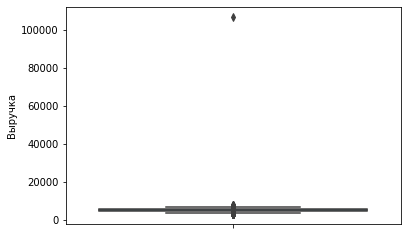

In [34]:
sns.boxplot(data=df_market_money, y='Выручка')

Замечен один пользователь с выручкой > 100000, что является выбросом, его нужно убрать из всех таблиц

In [35]:
anomal_user = df_market_money.query('Выручка > 40000')['id'].tolist()
df_market_file = df_market_file[~df_market_file['id'].isin(anomal_user)]
df_market_time = df_market_time[~df_market_time['id'].isin(anomal_user)]
df_market_money = df_market_money[~df_market_money['id'].isin(anomal_user)]
df_money = df_money[~df_money['id'].isin(anomal_user)]

print(df_market_file.shape, df_market_time.shape, df_market_money.shape, df_money.shape)

(1296, 13) (2592, 3) (3888, 3) (1296, 2)



<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍

<AxesSubplot:title={'center':'Уходящие пользователи'}, xlabel='Период', ylabel='Выручка'>

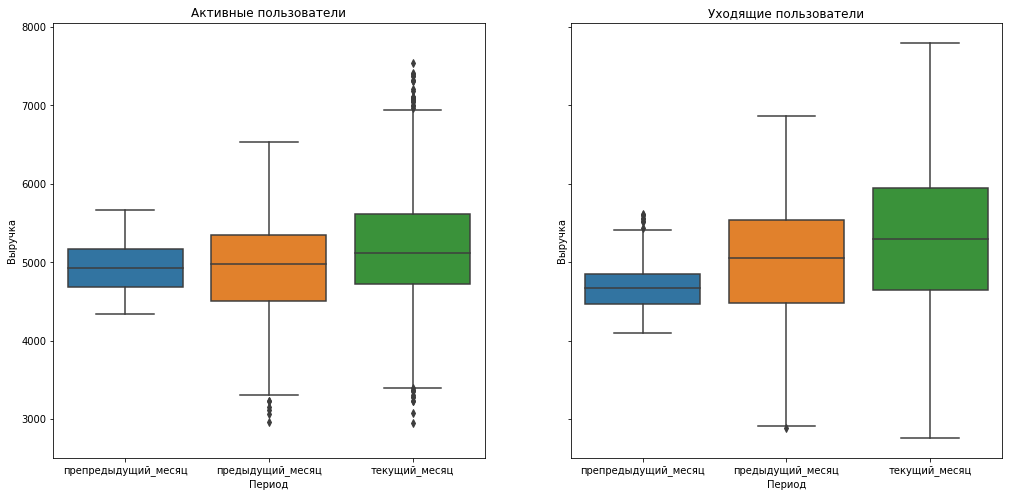

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8), sharey=True)
ax1.set_title('Активные пользователи')
sns.boxplot(data=df_market_money[df_market_money['id'].isin(active_ids)], x='Период', y='Выручка',
            order=['препредыдущий_месяц','предыдущий_месяц', 'текущий_месяц'], ax=ax1)
ax2.set_title('Уходящие пользователи')
sns.boxplot(data=df_market_money[~df_market_money['id'].isin(active_ids)], x='Период', y='Выручка',
            order=['препредыдущий_месяц','предыдущий_месяц', 'текущий_месяц'], ax=ax2)

С уходящий пользователей, на удивление, в текущем месяце получилось больше выручки, чем с активных. С течением времени, средняя выручка с уходящих пользователей росла стремительнее, чем с активных. Задача по удержанию этой категории пользователей стаёт ещё острее.

**Вывод**    
В результате исследовательского анализа данных получен портрет среднего уходящего пользователя.    
Пользователи со сниженной активностью обладают следующими чертами:
- Низкая активность за одну сессию, смотрит мало категорий и посещает мало страниц
- Ему приходит повышенное количество рекламы
- Очень часто пользуется акциями и скидками на товары


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Исследовательский анализ мы делаем для того, чтобы понять, какие закономерности заложены в наших данных. Здесь важно посмотреть на распределения признаков в разрезе целевого признака (снижения активности). 
    
Можно построить и наложить друг на друга гистограммы по данным в подвыборках с и без снижения активности. Можно расположить рядом два боксплота, для категориальных данных − две диаграммы.
    
Проще всего наложить гистограммы в контексте таргета, добавив в код гистограмм параметр hue='таргет'.
    
Думаю, так мы увидим гораздо больше интересной информации. Она нам особенно пригодится для части с исследованием сегмента покупателей.

***
    
По итогам исследовательского анализа  у нас должен быть вывод с портретом покупателя, который снижает активность: какие значения каких признаков для него будут характерны. Сколько страниц он в среднем просматривает, больше или меньше это, чем у активных пользователей, также с акционными покупками, временем на сайте и другими признаками. 
    
Фактически основной костяк выводов проекта делаем уже здесь. Модель нам нужна для перевода категориального признака (факт снижения активности) в вероятностный (вероятность снижения), чтобы дальше чуть более пластично исследовать выбранный сегмент.

       
</div> 

<div class="alert alert-info">
Ты полностью прав, изначально не догнал вообще суть проекта, из-за этого eda жиденький. Поправил
</div>

## Объединение таблиц

Объединим все таблицы в одну, сохраняя записи о выручке и времени по периодам

In [37]:
# Функция для преобразования таблиц в широкий формат
def pivot_table(df, value_col, prefix):
    """Преобразует таблицу из длинного в широкий формат"""
    pivoted = df.pivot_table(
        index='id',
        columns='Период',
        values=value_col,
        aggfunc='first'  # или 'sum', если у одного пользователя несколько записей за период
    ).reset_index()
    
    # Переименовываем столбцы
    pivoted.columns = ['id'] + [f'{prefix}_{col}' for col in pivoted.columns[1:]]
    
    return pivoted

# Преобразуем таблицу времени
time_pivot = pivot_table(df_market_time, 'минут', 'Время')

# Преобразуем таблицу выручки
revenue_pivot = pivot_table(df_market_money, 'Выручка', 'Выручка')

# Объединяем все таблицы
df = df_market_file.copy()

# Последовательно объединяем с таблицей времени и выручки
df = pd.merge(df, time_pivot, on='id', how='left')
df = pd.merge(df, revenue_pivot, on='id', how='left')

# Заполняем пропущенные значения нулями (если нужно)
df = df.fillna(0)

print("Итоговая таблица:")
df

Итоговая таблица:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Время_предыдущий_месяц,Время_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,14,7,3664.0,4704.0,4741.7
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,4729.0,5299.0,5353.0
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,12,18,5160.0,5334.0,5139.2
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,18,7,4923.0,4725.0,5224.6


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Если таблицы выводить через display() вместо print(), они будут аккуратнее по форматированию.

<div class="alert alert-info">
Согласен
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 По объединению таблиц замечательно.

**Вывод**    
Размерность итоговой таблицы совпадает с размерностью исходной таблицы market_file, объединение прошло успешно

## Корреляционный анализ

Проведём корреляционный анализ признаков, если будет обнаружены признаки с высокой корреляцией - удалим

In [38]:
def preprocess_data(df):
    df_processed = df.copy()
    
    for column in df_processed.columns:
        if df_processed[column].dtype == 'object':
            # Преобразуем строки в категориальные коды
            df_processed[column] = pd.Categorical(df_processed[column]).codes
    
    return df_processed

# Применяем преобразование
data_processed = preprocess_data(df)
data_processed.drop('id', axis=1, inplace=True)

<AxesSubplot:>

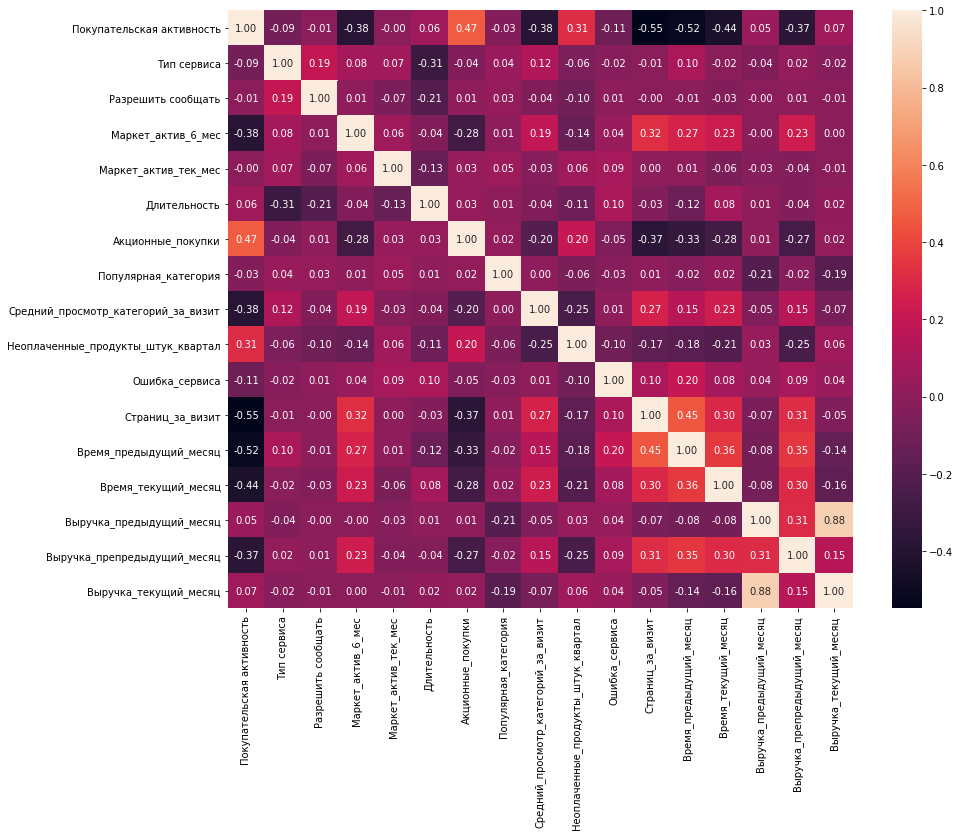

In [39]:
plt.figure(figsize=(14, 11))
sns.heatmap(data_processed.corr(method='spearman'), annot=True, fmt='.2f') 

Мультиколлинеарности не выявлено. Оставим признаки как есть

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Если корреляция ниже 0.9, то будем считать, что мультиколлинеарности нет.
    
У нас таргет - снижение активности. Если бы мы хотели замерить снижение самостоятельно, то самое простое, что можно сделать − сравнить выручку по периодам. Вот и модели это будет сделать полезно. Поэтому удалять один из периодов нельзя, в них важная для модели информация.
    
Если бы корреляция была настолько высокой, что и оставлять было бы нельзя, здесь можно было бы один из признаков заменить на разность между периодами. Тогда и информацию сохраним, и корреляцию уберем. Но у нас это не требуется, можно оставить признаки как есть.




<div class="alert alert-info">
Сначала хотел по твоему коменту добавить разность, но воздержался. Оставил как есть
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍  Часто это хорошая альтернатива, иногда фактура признаков такова, что разность - это то, что логически более важно, чем сам признак. Например, когда это становится индикатором изменения ( важна не статика ,а динамика ).
   

**Вывод**    
В результате корреляционного анализа признаков мультиколлинеарности не выявлено, признаки оставлены как есть

## Использование пайплайнов

Во время подготовки данных будем использовать ColumnTransformer. Количественные и категориальные признаки обработаем в пайплайне раздельно. Для кодирования категориальных признаков будем использовать OneHotEncoder и OrdinalEncoder, для масштабирования количественных — StandardScaler и MinMaxScaler.     

В качестве метрики будем использовать roc_auc, так как нам не нужна привязка к порогу классификации. Нам не важно, как хорошо модель ставит метку при определённом пороге, нам важно как с увеличением порога растёт способность модели различать.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
`В качестве метрики будем использовать roc_auc, т.к. нам важно, чтобы модель различала классы`
    
А почему не recall или precision, они тоже различают классы? 
    
А можем ли использовать accuracy или f1? Что нам важне по задаче?
    


<div class="alert alert-info">
Рок аук объяснил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 На самом деле дисбаланс небольшой, здесь важен баланс между полнотой и точностью, а он у нас хорошо просчитывается в том числе и метрикой ROC_AUC.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 С выбором метрики согасен, но нужно добавить аргументацию.

In [40]:
RANDOM_STATE=52
TEST_SIZE=0.25

In [41]:
simplefilter(action='ignore', category=FutureWarning)

In [42]:
df = df.set_index('id')

X = df.drop(['Покупательская активность'], axis=1)
y = df['Покупательская активность']

ohe_columns = ['Популярная_категория']
ord_columns = ['Разрешить сообщать', 'Тип сервиса']
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [43]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
    )
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['нет', 'да'],
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [44]:
pipe_tree = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

tree_param_grid = {
        'models__max_depth': [None, 5, 10, 15, 20],
        'models__min_samples_split': [2, 5, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }

grid_search_tree = GridSearchCV(
    pipe_tree, 
    tree_param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search_tree.fit(X_train, y_train)

print('Лучшая модель и её параметры:', grid_search_tree.best_params_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search_tree.best_score_)

Лучшая модель и её параметры: {'models__max_depth': 5, 'models__min_samples_split': 10, 'preprocessor__num': MinMaxScaler()}
Метрика лучшей модели на тренировочной выборке: 0.8542437271982726


In [45]:
pipe_knn = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])

param_grid_knn = {
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__n_neighbors': range(2, 5),
    }

grid_search_knn = GridSearchCV(
    pipe_knn, 
    param_grid_knn, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search_knn.fit(X_train, y_train)

print('Лучшая модель и её параметры:', grid_search_knn.best_params_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search_knn.best_score_)

Лучшая модель и её параметры: {'models__n_neighbors': 4, 'preprocessor__num': StandardScaler()}
Метрика лучшей модели на тренировочной выборке: 0.8986052788325516


In [46]:
pipe_lr = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        ))
])

param_grid_lr = {
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }

grid_search_lr = GridSearchCV(
    pipe_lr, 
    param_grid_lr, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search_lr.fit(X_train, y_train)

print('Лучшая модель и её параметры:', grid_search_lr.best_params_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search_lr.best_score_)

Лучшая модель и её параметры: {'models__C': 1, 'preprocessor__num': MinMaxScaler()}
Метрика лучшей модели на тренировочной выборке: 0.9069486635395727


In [47]:
pipe_svc = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(
            random_state=RANDOM_STATE,
            probability=True
        ))
])

param_grid_svc = {
        'models__C': [0.1, 1, 10],
        'models__kernel': ['linear', 'rbf', 'poly'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }

randomized_search_svc = RandomizedSearchCV(
    pipe_svc, 
    param_grid_svc, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search_svc.fit(X_train, y_train)

print('Лучшая модель и её параметры:', randomized_search_svc.best_params_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search_svc.best_score_)

Лучшая модель и её параметры: {'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__C': 1}
Метрика лучшей модели на тренировочной выборке: 0.9186374804556623


In [48]:
best_model = randomized_search_svc.best_estimator_

В результате обучения моделей можно выявить лучшую из них:    
- Лучшая модель и её параметры: Логистическая регрессия с гиперпараметрами: C: 0.1, ядро: rbf, с MinMaxScaler
- Метрика лучшей модели на тренировочной выборке: 0.9186374804556623   

Проверим качество на тестовой выборке

In [49]:
y_pred_probas = best_model.predict_proba(X_test)[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, y_pred_probas))

Площадь ROC-кривой: 0.8969556451612903


На тестовой выборке модель показала результат в 0.8969556451612903

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В тренажере была неточность. Строго говоря, выше выводишь качество не на тренировочной выборке (это когда на чем обучились, на том и предсказали), а на кросс-валидации. Внутри кросс-валидации у нас есть разделение на сплиты, часть из них (тренировочный сплит) участвует в обучении, тестовый (или валидационный) - в обучении не участвует, на нем мы оцениваем качество и подбираем гиперпараметры. Это все скрыто от нас внутри функции, но в итоге мы получаем некоторую приближенную к объективной оценку.
    
Если же обучить модель на тренировочной выборке, а затем на ней же предсказать качество, то оно будет близко к 100%. Иногда такую оценку на тренировочной выборке используют для того, чтобы проверить, что модель вообще обучается. 
        
</div> 



<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Забыли провести тестирование модели на тестовой выборке.   
    
***

    
Выше мы разделяли данные на тренировочную и тестовую выборки (до пайплайна). Тестовую выборку пока мы никак не задействали.
    
Здесь важно взять лучшую модель и оценить ее качество на тестовой выборке. Так мы проведем тестирование модели. Качество по кросс-валидации тестированием не считается.
    
***
    
Напомню: roc_auc нужно считать по вероятностям классов. 
    
`probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))`

Самое подробное объяснение метрики, что я видел на русском языке, можно посмотреть здесь: https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/ 




<div class="alert alert-info">
Добавил тест на выборке
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 

## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP

Вручную получим названия признаков после подготовки данных в пайплайне

In [50]:
def get_ct_feature_names(ct):
    feature_names = []
    
    for name, transformer, columns in ct.transformers_:
        if transformer == 'drop':
            continue
            
        # Если это пайплайн
        if hasattr(transformer, 'steps'):
            # Берем последний шаг пайплайна
            last_step = transformer.steps[-1][1]
            if hasattr(last_step, 'get_feature_names'):
                names = last_step.get_feature_names(columns)
            else:
                names = columns if isinstance(columns, list) else [columns]
        # Если это обычный трансформер
        elif hasattr(transformer, 'get_feature_names'):
            names = transformer.get_feature_names(columns)
        else:
            names = columns if isinstance(columns, list) else [columns]
        
        prefixed_names = [f"{name}__{feature}" for feature in names]
        feature_names.extend(prefixed_names)
    
    return feature_names

data_preprocessor.fit(X_train)
feature_names = get_ct_feature_names(data_preprocessor)

In [51]:
feature_names

['ohe__Популярная_категория_Косметика и аксесуары',
 'ohe__Популярная_категория_Кухонная посуда',
 'ohe__Популярная_категория_Мелкая бытовая техника и электроника',
 'ohe__Популярная_категория_Техника для красоты и здоровья',
 'ohe__Популярная_категория_Товары для детей',
 'ord__Разрешить сообщать',
 'ord__Тип сервиса',
 'num__Маркет_актив_6_мес',
 'num__Маркет_актив_тек_мес',
 'num__Длительность',
 'num__Акционные_покупки',
 'num__Средний_просмотр_категорий_за_визит',
 'num__Неоплаченные_продукты_штук_квартал',
 'num__Ошибка_сервиса',
 'num__Страниц_за_визит',
 'num__Время_предыдущий_месяц',
 'num__Время_текущий_месяц',
 'num__Выручка_предыдущий_месяц',
 'num__Выручка_препредыдущий_месяц',
 'num__Выручка_текущий_месяц']

  0%|          | 0/500 [00:00<?, ?it/s]

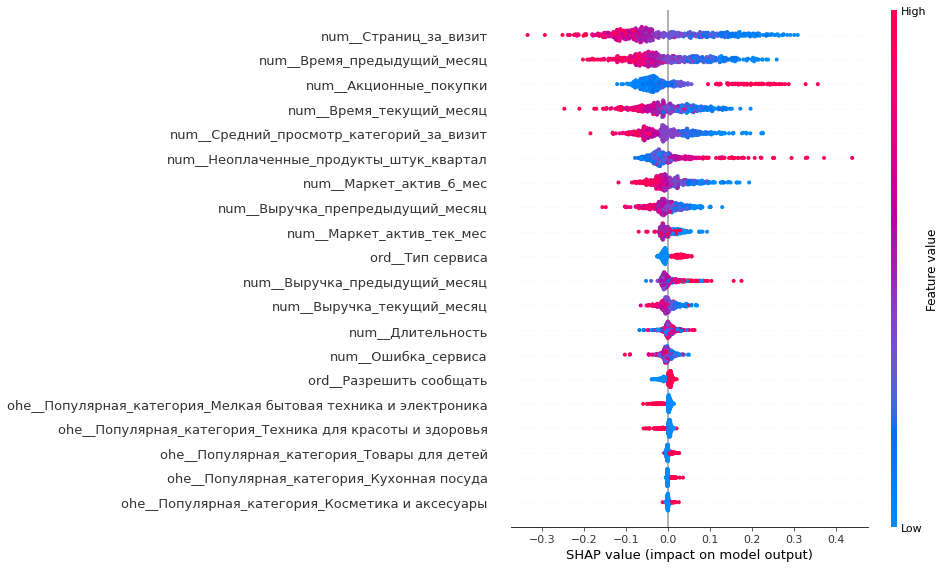

In [52]:
X_test_prepared = best_model.named_steps['preprocessor'].transform(X_test)
X_train_prepared = best_model.named_steps['preprocessor'].transform(X_train)

# Ваш текущий код берет только 50 сэмплов, увеличим до 500 
sample_size = 500  # можно увеличить до 1000, 2000 и т.д.

explainer = shap.SamplingExplainer(
    lambda x: best_model.named_steps['models'].predict_proba(x)[:,1],
    X_test_prepared[:sample_size]  # БОЛЬШЕ сэмплов для background
)

# Берем больше сэмплов для расчета SHAP значений
shap_values = explainer(X_train_prepared[:sample_size])  # БОЛЬШЕ сэмплов

explanation = shap.Explanation(
    values=shap_values.values,
    base_values=shap_values.base_values,
    data=X_train_prepared[:sample_size],  # БОЛЬШЕ данных
    feature_names=feature_names
)

shap.plots.beeswarm(explanation, max_display=20)

**Вывод**    
Из анализа важности признаков можно подчерпнуть следующий инсайд:    
Действительно, инсайды из исследовательского анализа данных подтверждаются - уходящие покупатели - пользователи, которые смотрят мало страниц за один визит (в целом проводят мало времени на сервисе), покупают в основном товары по акции и обладают премиум подпиской. Вполне вероятно, что пользователи добавляют в корзину желаемый товар и ждут на него акции/скидки (скорее всего, ещё и уведомление об этом приходит). Дополнительно это подтверждается тем, что такие пользователи дали согласие на рассылку доп. предложений о товарах. Решением будет повысить значение маркетинговых коммуникаций компании, которое приходится на таких покупателей (больше звонков, рассылок, рекламы для таких пользователей)


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь мы должны будем сопоставить важность признаков с тем, что мы увидим в исследовательском анализе (по сопоставлению признаков в контексте таргета)
    
Также по заданию нас просят здесь дать бизнес-выводы, то есть, попробовать интерпретировать такое спефицическое распределение признаков. Почему снижающие активность клиенты чаще покупают по акции, оставляют неоплаченные товары в корзине, меньше времени проводят на сайте?
    
Работает ли преимум подписка? Существенны ли ошибки на сайте для снижения активности?




<div class="alert alert-info">
Шап анализ был очень жидкий. На бисворме можно лучше интерпретировать как модель работает, конкретно для нашей задачи. Подправил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Все ок. Смотри, я бы предположил, что товары в корзине могут быть также и из-за того, что покупатели сначала добавили, а потом оно подорожало или акция завершилась. Теперь покупатели ждут следующей акции или типа того. Может верен твой вариант, может этот. Пока можем придержать обе гипотезы.

## Сегментация покупателей 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Ок, хорошо, можем использовать k-средних. 
    
Давай здесь проговорим тогда логику, которая предполагалась авторами проекта.

В самом начале было бы логично прописать, какой сегмент и почему мы выбрали для анализа. По заданию предполагается, что сегмент мы будем выбирать исходя из анализа выше.
    
Логика может быть следующей: выше мы исследовали, чем активные клиенты различаются с клиентами, чья активность снижается. Проанализировали все закономерности итд, а здесь мы на основе анализа выбираем группу, активность которой нам выгоднее удерживать в первую очередь. Или группу, исследование которой может уточнить наши выводы о данных.





<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

А какие пропуски и зачем мы заполняем выше в коде? 
    
***
    
Целевой класс у нас снижение активности, логично его закодировать единицей, а не нулем. 

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Не годится. Смотри, то, чем активные пользователи отличаются от снижающих активность мы должны будем исследовать выше в исследовательском анализе работы. Здесь не очень понятно, зачем мы делали кластеризацию, понижение размерности и так далее, чтобы отделить пользователей по целевому признаку? Так они у нас и так разделены. Пока это действие видется бессмысленным.

<div class="alert alert-info">
На счёт сегментации я вообще наделал много фигни, т.к. вообще не понял что от меня требовалось. С твоими пояснениями (кстати очень крутыми, спасибо большое) дошёл до нормального решения
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍  Все ок. Круто, что ты сразу понял идею, дальше уже все пошло легко.

Произведём сегментацию покупателей. Для этого добавим в наш датафрейм с выручкой вероятности снижения покупательской активности

In [53]:
df_money.set_index('id', inplace=True)
df_money['Риск_снижения_активности'] = best_model.predict_proba(X)[:, 1]
df_money.head()

,Прибыль,Риск_снижения_активности
id,,
215349,4.16,0.987737
215350,3.13,0.296363
215351,4.87,0.943834
215352,4.21,0.973364
215353,3.95,0.761503


Выгоднее всего удерживать пользователей, которые приносят нам хорошую выручку. Сегментировать будем по выручке и риску потери пользователей. Дополнительно мы введём подсветку пользователей с зависимостью от акционных покупок. Порог возьмём из исследователького анализа данных

<AxesSubplot:xlabel='Прибыль', ylabel='Риск_снижения_активности'>

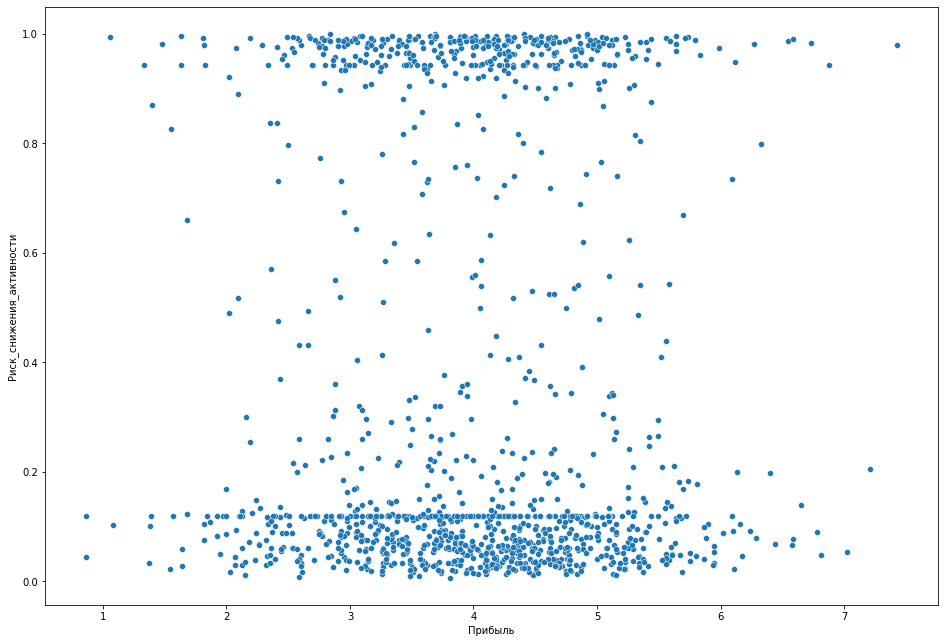

In [54]:
plt.figure(figsize=(16, 11))
sns.scatterplot(data=df_money, y='Риск_снижения_активности', x='Прибыль')

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Абсолютно верно.

Рассмотрим данные о прибыли, полученной с пользователей

<AxesSubplot:xlabel='Прибыль'>

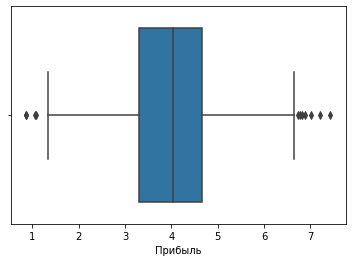

In [55]:
sns.boxplot(data=df_money, x='Прибыль')

In [56]:
df_money['Прибыль'].describe()

count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

Логично будет удерживать пользователей с относительно высокой выручкой (>50%) и высокой вероятностью ухода (>85%). На графике выше заметно большое скопление пользователей с высокой вероятностью оттока, однако всех их удерживать может оказаться финансово нецелесообразно. Попилим эту категорию по медиане прибыли и выберем большую половину. Отберём таких пользователей и произведём анализ этой категории.

In [57]:
targeted_user_ids = df_money.query('Прибыль > 3.3 & Риск_снижения_активности > 0.85').index.tolist()

In [58]:
df_targeted = df.loc[df.index.isin(targeted_user_ids)]
df_targeted.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Время_предыдущий_месяц,Время_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.6
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.5
215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,11,12,5685.0,4503.0,5869.6
215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,6,7,4146.5,4433.0,4566.4


In [59]:
df_other = df.loc[~df.index.isin(targeted_user_ids)]
df_other.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Время_предыдущий_месяц,Время_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц
id,,,,,,,,,,,,,,,,,
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.5
215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,12,10,3263.0,4749.0,3772.6
215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,14,10,3488.0,4727.0,4209.5
215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,9,6,5304.5,5555.0,5834.9


In [60]:
df_targeted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 215349 to 216636
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            270 non-null    object 
 1   Тип сервиса                          270 non-null    object 
 2   Разрешить сообщать                   270 non-null    object 
 3   Маркет_актив_6_мес                   270 non-null    float64
 4   Маркет_актив_тек_мес                 270 non-null    int64  
 5   Длительность                         270 non-null    int64  
 6   Акционные_покупки                    270 non-null    float64
 7   Популярная_категория                 270 non-null    object 
 8   Средний_просмотр_категорий_за_визит  270 non-null    int64  
 9   Неоплаченные_продукты_штук_квартал   270 non-null    int64  
 10  Ошибка_сервиса                       270 non-null    int64  
 11  Страниц_за_визит        

Рассмотрим тип сервиса у таких пользователей

In [61]:
def comparative_plots(x):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 12))
    ax1.set_title('Выбранный сегмент')
    ax1.tick_params(axis='x', rotation=45)
    sns.histplot(x=x, data=df_targeted, ax=ax1, stat='density')
    ax2.set_title('Остальные пользователи')
    ax2.tick_params(axis='x', rotation=45)
    sns.histplot(x=x, data=df_other, ax=ax2, stat='density')
    plt.tight_layout()

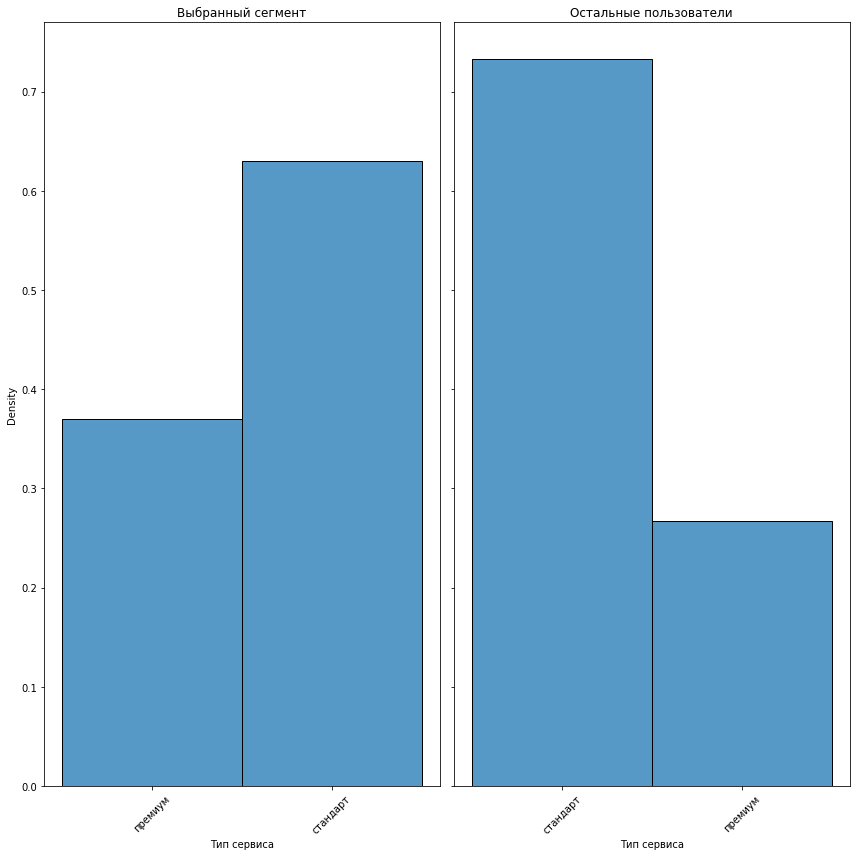

In [62]:
comparative_plots('Тип сервиса')

Доля премиум подписчиков в выбранном сегменте больше, но отток всё равно максимальный - странно

Рассмотрим как распределены акционные покупки у нашего сегмента

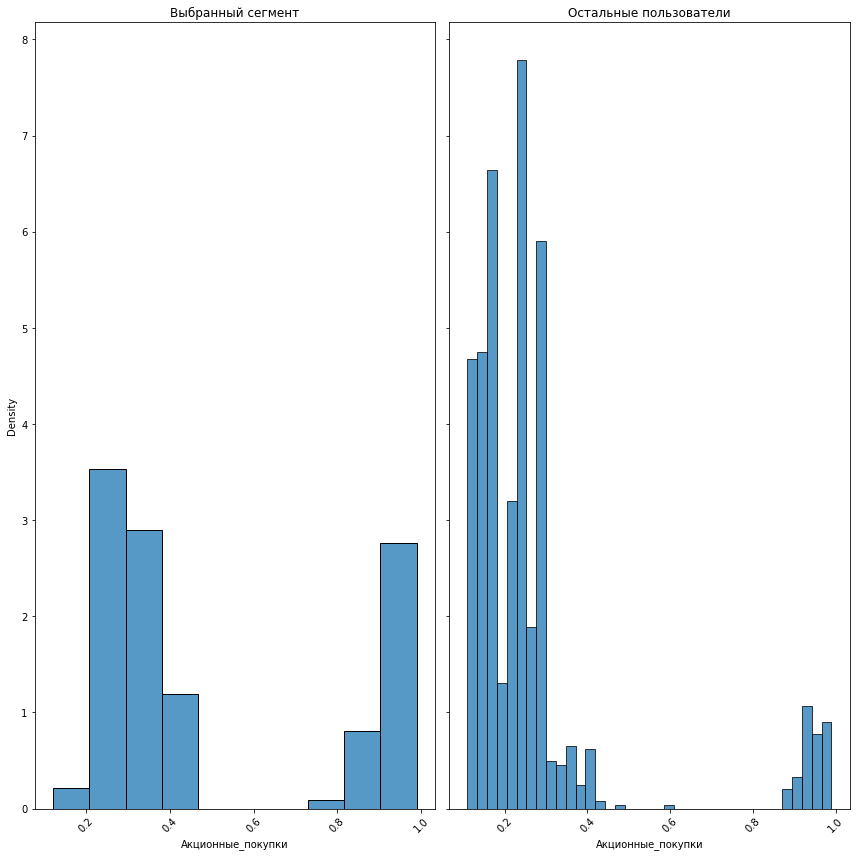

In [63]:
comparative_plots('Акционные_покупки')

Как и ожидалось, наши пользователи чаще прибегают к акционным покупкам

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Да, вывод, что наши товарищи не отличаются от большинства - тоже важный вывод.

Посмотрим распределение категорий

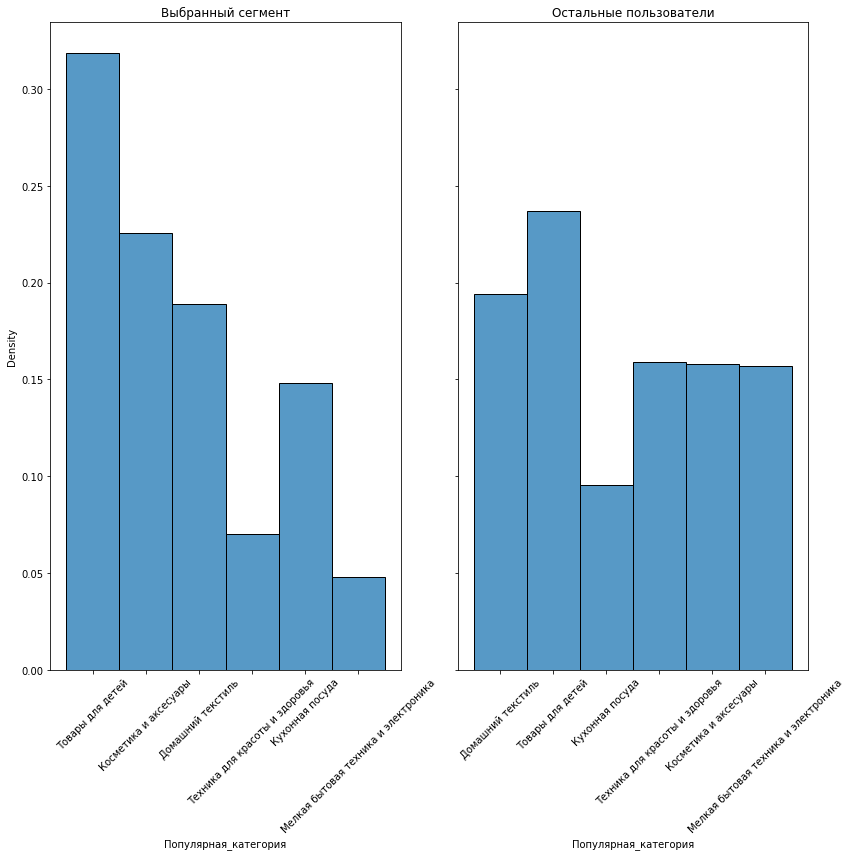

In [64]:
comparative_plots('Популярная_категория')

Распределение категорий отличается, самый актуальная категория у нашего сегмента - товары для детей (как и у остальных пользователей), однако мелкая бытовая техника и электроника вообще не просматривается, как и техника для красоты и здоровья. Вполне вероятно, что пользователи уже купили всю необходимую технику по акциям и получают неправильные рекомендации. Нужно разобраться, насколько много с ними контактирует маркет

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 

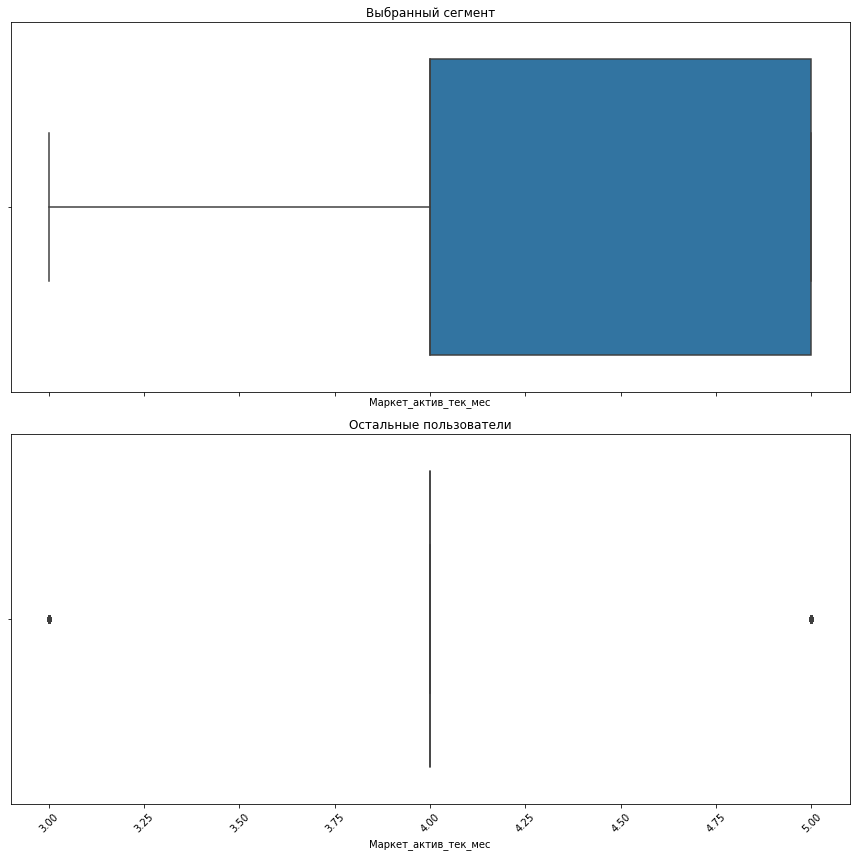

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
ax1.set_title('Выбранный сегмент')
ax1.tick_params(axis='x', rotation=45)
sns.boxplot(x='Маркет_актив_тек_мес', data=df_targeted, ax=ax1)
ax2.set_title('Остальные пользователи')
ax2.tick_params(axis='x', rotation=45)
sns.boxplot(x='Маркет_актив_тек_мес', data=df_other, ax=ax2)
plt.tight_layout()

В этом месяце с пользователями из выбранного сегмента контактируют больше чем с остальными, посмотрим на ситтуацию в прошлом. 

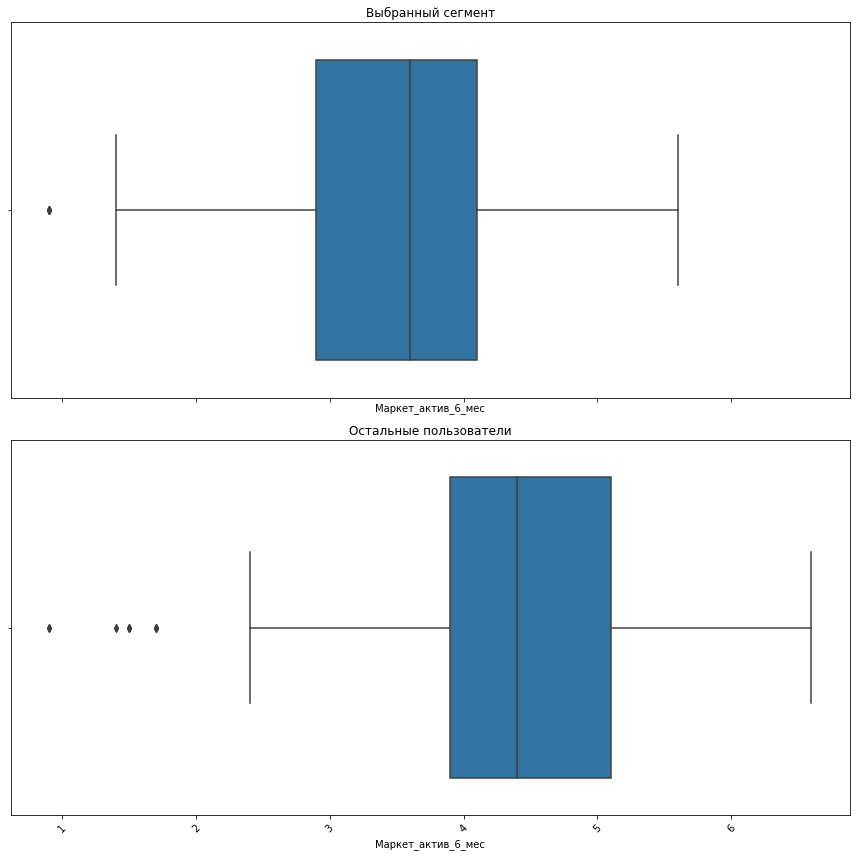

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
ax1.set_title('Выбранный сегмент')
ax1.tick_params(axis='x', rotation=45)
sns.boxplot(x='Маркет_актив_6_мес', data=df_targeted, ax=ax1)
ax2.set_title('Остальные пользователи')
ax2.tick_params(axis='x', rotation=45)
sns.boxplot(x='Маркет_актив_6_мес', data=df_other, ax=ax2)
plt.tight_layout()

Однако в за прошедшие месяцы актива в сторону пользователей было меньше, что не сказать про остальных пользователей

<AxesSubplot:xlabel='Разрешить сообщать', ylabel='Count'>

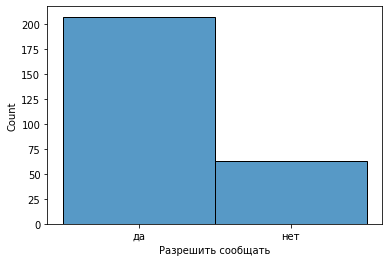

In [67]:
sns.histplot(data=df_targeted, x='Разрешить сообщать')

Посмотрим на выручку по месяцам у нашего сегмента

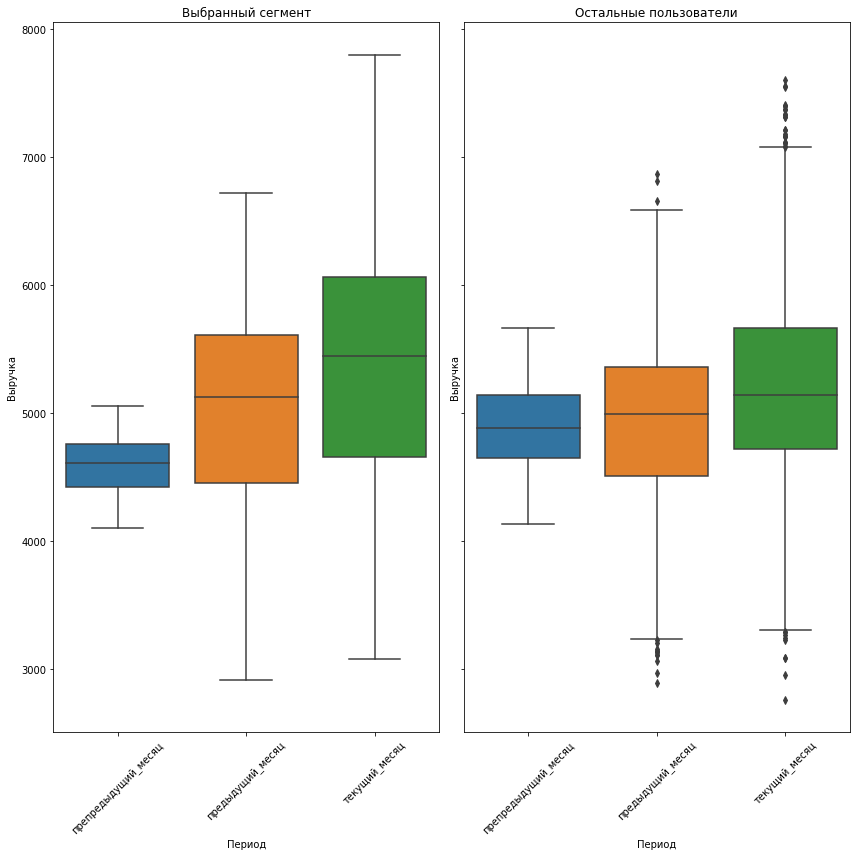

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 12))
ax1.set_title('Выбранный сегмент')
ax1.tick_params(axis='x', rotation=45)
sns.boxplot(data=df_market_money[df_market_money['id'].isin(targeted_user_ids)], x='Период', y='Выручка',
            order=['препредыдущий_месяц','предыдущий_месяц', 'текущий_месяц'], ax=ax1)
ax2.set_title('Остальные пользователи')
ax2.tick_params(axis='x', rotation=45)
sns.boxplot(data=df_market_money[~df_market_money['id'].isin(targeted_user_ids)], x='Период', y='Выручка',
            order=['препредыдущий_месяц','предыдущий_месяц', 'текущий_месяц'], ax=ax2)
plt.tight_layout()

Однако выручка пользователей из выбранного сегмента растёт с каждым месяцем.

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 То есть вот парадокс - наши пользователи до некоторого снижения активности ее только наращивали. Ну я бы ставил на то, что для них была какая-то промо-акция на привлечение, которая достаточно бездарно резко завершилась, что и привело к нежелательным маркетинговым последствиям. Здесь немного шерлокхолмство без возможности уточнить реальное положение дел, но данные вполне интересные.
    

А не может ли ошибки сервиса влиять на активность?

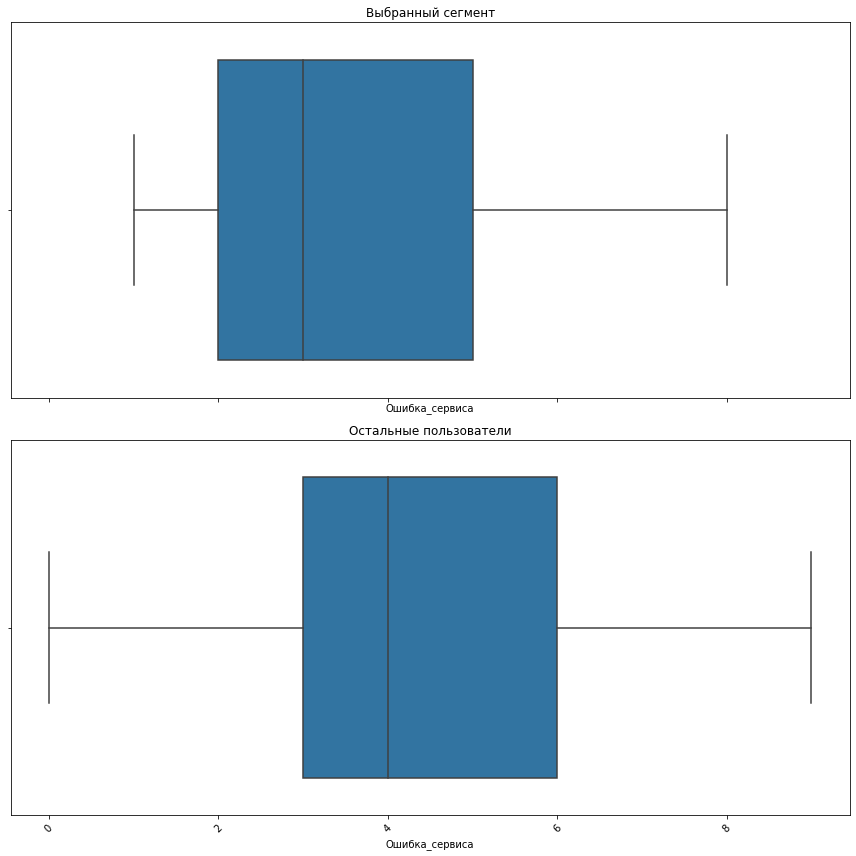

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
ax1.set_title('Выбранный сегмент')
ax1.tick_params(axis='x', rotation=45)
sns.boxplot(x='Ошибка_сервиса', data=df_targeted, ax=ax1)
ax2.set_title('Остальные пользователи')
ax2.tick_params(axis='x', rotation=45)
sns.boxplot(x='Ошибка_сервиса', data=df_other, ax=ax2)
plt.tight_layout()

Ошибок в выбранном сегменте в среднем гораздо меньше. Дело не в этом

В заключение, осмотрим количество неоплаченных товаров у пользователей

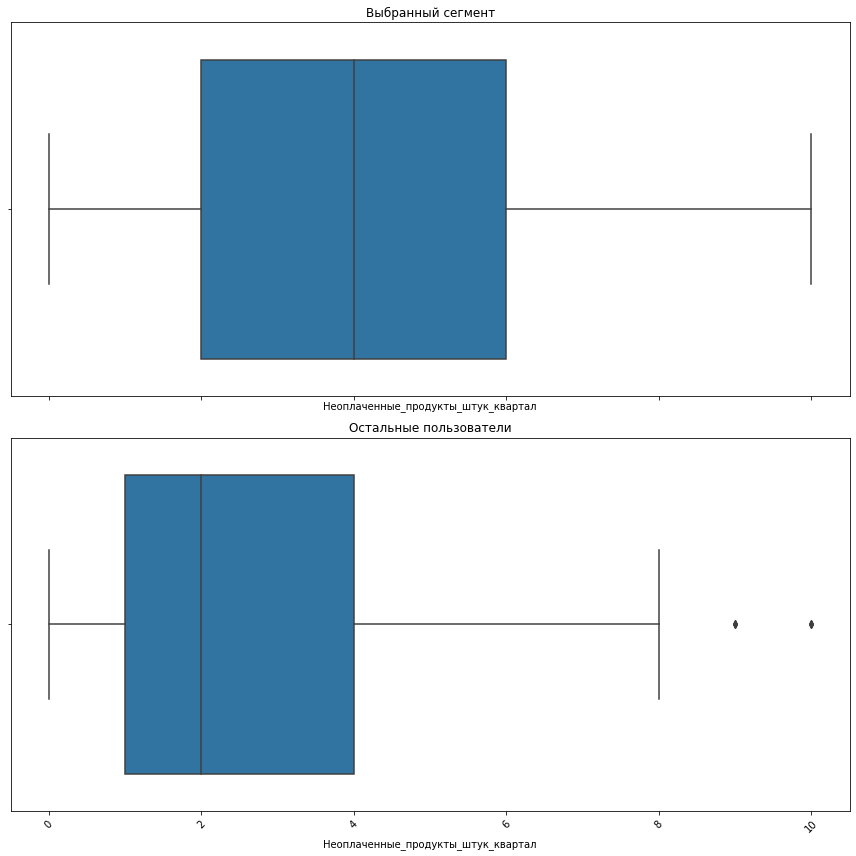

In [70]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
ax1.set_title('Выбранный сегмент')
ax1.tick_params(axis='x', rotation=45)
sns.boxplot(x='Неоплаченные_продукты_штук_квартал', data=df_targeted, ax=ax1)
ax2.set_title('Остальные пользователи')
ax2.tick_params(axis='x', rotation=45)
sns.boxplot(x='Неоплаченные_продукты_штук_квартал', data=df_other, ax=ax2)
plt.tight_layout()

У выбранного сегмента больше неоплаченных товаров в корзине. Анализ окончен - можно приступать к выводам

**Вывод**     
Из проведённого анализа можно сделать вывод, что покупатели из выбранного сегмента (выручка выше среднего, высокий риск потери) - пришли в сервис из-за акций. Вполне верятно их завлекли болшими скидками с премиум подпиской (объясняет высокое количество пользователей с премиумом среди уходящих пользователей). Среди уходящих пользователей не популярны категории электроники, хотя у других пользователей это не так - значит они их уже купили и покупать более не планируют (что логично, это одноразовые покупки). Также, у этой группы больше неоплаченных товаров в корзине, что может быть в виду двух причин: они добавляют в корзину товары в надежде что на них будет акция или на них уже есть акция, они хотят его купить но акция заканчивается, что может раздражать пользователей, из-за этого и отток     

В итоге - перед нами пользователи, привлечённые акциями (может быть с участием премиума), зачастую с премиум подпиской, которые совершают много акционных покупок. Имея портрет таких пользователей - можно сделать следующие рекомендации:
 - Удерживаем таких пользователей с помощью акций, однако их нужно персонализировать, на основе их корзины/популярной среди пользователя категории
 - С целевыми пользователями за последние 6 месяцев контактировали меньше чем в текущем месяце. Возможно стоит оставить частоту звонков/рассылок на прежнем уровне. Излишнее навязывание услуг может отпугивать пользователей

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
`Уменьшать акции?` А что, они плохо работают? Кажется, что акции лучше всего удерживают активность, а нам и нужно удержать активность. Тогда логично делать обратное тому, что ты предлагаешь.
    
`Внедрить рекомендательную систему?` А у нас есть данные о сайте? Ты видишь, что у нас нет рекомендательной системы? А вдруг она есть и ты будешь рекомендовать заказчику тратить деньги на то, что он и так уже имеет? Здесь я бы не стал давать рекомендаций по внешнему виду или функциональности сайта ,у нас про это нет данных.
    
`Снизить частоту маркетинговых сообщений, но повысить их персонализацию и релевантность.` -а как это физически реализуемо в реальном большом маркетплейсе типа Озона или Вайлдберриз? Нанять миллион людей, которые будут персонализированно рассылать сообщения? Здесь требуется пояснение твоего предложения. На основе каких выводов в анализе ты приходишь к этой рекомендации и как ее собираешься внедрять? Возможно, это предложение хорошее, но оно нуждается в твоем пояснении.
    
`Провести аудит технических проблем, устранить частые ошибки и улучшить стабильность сервиса.` - а количество ошибок выше у снижающих активность пользователей или оно одинаковое. Если оно одинаковое и ошибки не влияют на активность, тогда возможно не стоит чинить то, что не ломалось?
    
Важно выше в проекте проанализировать, чем снижающие активность пользователи отличаются от лояльных. В шаге сегментации выбрать сегмент, который будем удерживать в первую очередь, описать, почему выгодно удерживать именно этот сегмент. И дальше проанализировать, как именно стоит удерживать наш сегмент. 
    
Сейчас твои рекомендации вообще никак не связаны с анализом и не основаны на данных. Не думаю, что такой проект был бы готов к передаче заказчику.
    
***
    
    
`8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.`

Попробую описать, что мы должны сделать:
    
Самое важное − мы должны по заданию выбрать некоторый сегмент пользователей, обосновать выбор сегмента, обосновать то, как мы этот сегмент определяем (почему выбираем такие значения признаков для отбора пользователей в сегмент), а дальше исследовать только этот сегмент.
    
1) Под результатами моделирования здесь мы понимаем предсказания нашей модели, то есть, вероятности классов. Мы можем ранжировать клиентов по вероятности снижения активности и таким образом использовать эту информацию как одну из осей скаттерплота (для примера). Второй осью тогда будет какая-то категория, которая будет логичной после выбора сегмента. Например, если выбираем сегмент с высокой вероятностью снижения активности и высокой выручкой, то второй шкалой в скаттерплоте будет выручка.

    
2) Важно аргументировать выбор границ и для вероятности снижения активности, и для прибыльности. Как раз это будет удобно сделать, солавшись на график (думаю, скаттерплот тут в качестве типа визуализации будет выигрывать).
    
    
Дальше следует провести исследование для выбранного сегмента: посмотреть на данные в разрезе периодов, в разрезе категорий товаров, акций итд. Нужно выявить факторы, которые сильнее всего влияют на снижение активности и предложить решения для минимизации негативного воздействия этих факторов.

***
    
Например, если бы мы выбрали сегментом для анализа клиентов с высокой долей акционных покупок и высоким риском снижения активности, наш анализ мог бы выглядеть так:
    
Мы видим, что у нас есть группа клиентов, которая практически все покупала только по акции. Выше я описал, что еси бы доступ к акциям был равный, то и распределение доли акционных покупок было близкое к нормальному, но точно не бимодальным, как мы наблюдаем. Следовательно, у нас есть группа, которую привлекли специальными акциями на определенные товары.
    
Это может объяснять, почему «акционщики» просматривают сильно меньше страниц и проводят меньше времени на сайте − они приходят за конкретными товарами и не сильно заинтересованы в исследовании остального ассортимента.
    
Можно предположить, что в какой-то момент акции для этой группы закончились. Это объясняет, почему клиенты со сниженной активностью имеют много неоплаченных товаров в корзине (цена изменилась, покупка отложилась).
    
Тогда можно посмотреть: а какова выручка у таких клиентов? Выгодно ли нам продлевать акции. Видим, что еще как выгодно. Тогда логично будет уточнить, а какие категории товаров популярны у нашего сегмента.
    
Для этого мы можем посмотреть суммарную выручку с группировкой по категориям товаров и с разбивкой по периодам (будут три периода). Можно реализовать это с помощью сводных таблиц и визуализировать. 
    
Для каждого из популярных товаров мы увидим динамику для нашего сегмента. Увидим, какие товары были популярны и снизили популярность. Если это товары длительного потребления (для примера - фены или утюги), то вряд ли клиентам будет нужно снова покупать ровно эти товары, тогда логично предложить им акции на что-то смежное.
    
Дополнительно важно проанализировать потенциально влияющие на отток признаки, которые у нас есть:
    
* количество ошибок на сайте - различается ли оно у активных и снижающих активность клиентов? Есть ли какие-то аномалии именно для нашего сегмента?
    
* премиум подписка - влияет ли на активность, а должна ли влиять? Если нет, то возомжно это потенциально полезный инструмент удержания, который почему-то пока не работает. 
</div>



<div class="alert alert-info">
Спасибо огромное что расписал! После этого реально стало лучше понятно как подступиться к задаче!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Спасибо, что вникнул. Кажется, можно было бы и не расписывать в твоем случае, ты сразу изменил фокус на этапе EDA и дальше все уже пошло правильно. 


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Важно уточниться по исследованию и выводам.

## Общий вывод

**Задача проекта**:    
Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Результаты предобработки данных**:
- Пропуски не обнаружены
- Удалены неявные дупликаты в столбце "Тип сервиса" в таблице с основными данными
- Удалены неявные дупликаты в столбце "Период" в таблице с данными о проведённом пользователями времени
- Исправлен тип данных у столбца "Прибыль" в таблице с данными о выручке

**Поиск лучшей модели**:    
Были обучены 4 модели, из них LogisticRegression, SVC, DecisionTreeClassifier, KNeighborsClassifier. Для обучения использовались пайплайны для предобработки данных и подбору гиперпараметров. Гиперпараметры для всех классификаторов, кроме SVC перебирались GridSearch'ем, для SVC был выбран RandomizedSearch для оптимизации. В качестве метрики был выбран roc_auc.

По итогам обучения, была выявлена лучшая модель - метод опорных векторов с RBF ядром с гиперпараметром С - 1.

**Сегментация покупателей**:    
Сегментация была произведена на основе риска потери клиента и его выручке. В исследуемый сегмент были отобраны пользователи с выручкой выше среднего и очень высоким риском оттока. Для этого сегмента был проведён сравнительный анализ относительно других пользователей с визуализацией. По итогу были разработаны следующие предложения:
 - Удерживаем таких пользователей с помощью акций, однако их нужно персонализировать, на основе их корзины/популярной среди пользователя категории
 - С целевыми пользователями за последние 6 месяцев контактировали меньше чем в текущем месяце. Возможно стоит оставить частоту звонков/рассылок на прежнем уровне. Излишнее навязывание услуг может отпугивать пользователей

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Основное по рекомендациям верно. Можно было бы еще накидать более мелких замечаний: по премиуму, ошибкам итд. 
    
Молодец и по пайплайнам, и по исследованию. Всегда супер приятно, когда доработка максимально вдумчивая и качественная.


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Также уточняемся по выводам. Думаю, здесь можем обойтись без кластеризации, стоит выбрать сегмент по простой бизнес-логике - кого выгоднее удерживать в первую очередь.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Эта работа также была достаточно объемной и требовала концентрации внимания. По структуре проекта и общему подходу все замечательно.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошие решения в коде, есть пояснения и аргументации.
* Грамотная предобработка и подготовка признаков.
* Корректное обучение моделей, использование пайплайнов.

    
**На что стоит обратить внимание🤔**
    
Основная цель проекта - рекомендации бизнесу. Важно держать это в фокусе внимания. Здесь аналитическая составляющая совсем не факультативное добавление к модели, скорее все наоборот.
    
* Важно в исследовательском анализе рассмотреть отдельно подвыборки для клиентов со снижающейся и с постоянной активностью (делим по целевому признаку).
* Не стоит удалять признаки из периодов. Эти признаки нужны. При корреляции до 0.9 можно оставить оба признака.
* Важно подсчитать качество модели на тестовой выборке. 
* Необходимо обосновать выбор метрики качества.
* Важно провести тестирование.
* Нужно добавить бизнес-выводы по shap.
* Необходимо определить сегмент для анализа по результатам модели - вероятностям классов.
* Важно также углубить и исследование сегмента: там, где можем, смотрим на динамику в категориях товаров. Я бы посмотрел на данные в разрезе акции.
* Выводы должны опираться на данные, быть аргументированными и полезными для бизнеса.
* Эти и остальные замечания я также написал по ходу проекта.    

**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>


<div class="alert alert-info">
Спасибо за ревью! Всё было содержательно и по фактам. Поправил моменты - отправляю на повторное ревью
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за внимательнейшую доработку. 🤝

Критичных комментариев нет. Отличный проект.
    
Если что-то пропустил или остались вопросы, напиши в телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>
